

"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from zipfile import ZipFile
from keras import utils
import matplotlib.pyplot as mpl
import keras

In [2]:
file_name = "Celebrity Faces Dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")
zip.close()

Done


In [64]:
directory="Celebrity Faces Dataset"

In [65]:
Im_size=224
batch_size=128
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,
                                                                horizontal_flip=True,validation_split=0.1)

valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.1 )

In [66]:
train_generator = train_datagen.flow_from_directory(
            directory,
            target_size=(224, 224),  # Adjust according to your model's input shape
            batch_size=32,
            class_mode='categorical',
            subset='training'
            )

validation_generator = valid_datagen.flow_from_directory(
            directory,
            target_size=(224, 224),  # Adjust according to your model's input shape
            batch_size=32,
            class_mode='categorical',
            subset='validation'
            )

Found 1620 images belonging to 17 classes.
Found 179 images belonging to 17 classes.


In [67]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(17,activation='softmax'))

In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 26, 26, 32)       

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,batch_size=32,epochs=5,validation_data=validation_generator,verbose=1)

Epoch 1/5
51/51 [==============================] - 127s 2s/step - loss: 2.9625 - accuracy: 0.1160 - val_loss: 2.6262 - val_accuracy: 0.1564
Epoch 2/5
51/51 [==============================] - 126s 2s/step - loss: 2.5363 - accuracy: 0.1667 - val_loss: 2.2979 - val_accuracy: 0.2346
Epoch 3/5
51/51 [==============================] - 126s 2s/step - loss: 2.3001 - accuracy: 0.2420 - val_loss: 2.0830 - val_accuracy: 0.3184
Epoch 4/5
51/51 [==============================] - 126s 2s/step - loss: 2.0695 - accuracy: 0.3253 - val_loss: 2.0555 - val_accuracy: 0.3128
Epoch 5/5
51/51 [==============================] - 127s 2s/step - loss: 1.9130 - accuracy: 0.3593 - val_loss: 1.8150 - val_accuracy: 0.3631


In [73]:
model.evaluate(validation_generator)

6/6 [==============================] - 3s 513ms/step - loss: 1.8150 - accuracy: 0.3631


[1.8149774074554443, 0.3631284832954407]

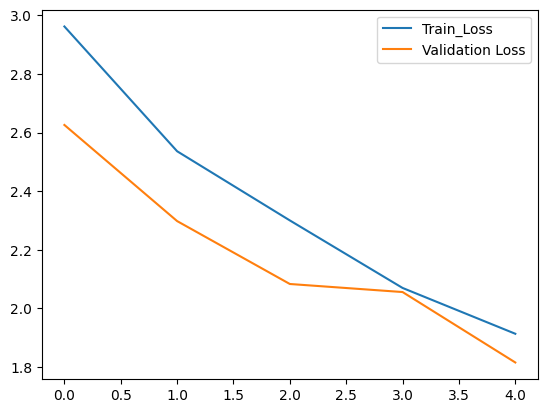

In [74]:
mpl.plot(history.history['loss'],label='Train_Loss')
mpl.plot(history.history['val_loss'],label='Validation Loss')
mpl.legend()

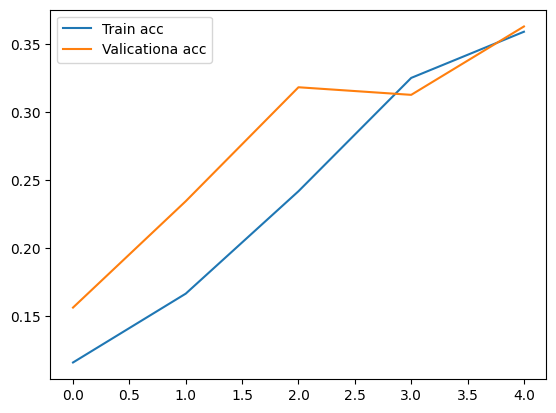

In [75]:
mpl.plot(history.history['accuracy'],label='Train acc')
mpl.plot(history.history['val_accuracy'],label='Valicationa acc')
mpl.legend(loc='upper left')

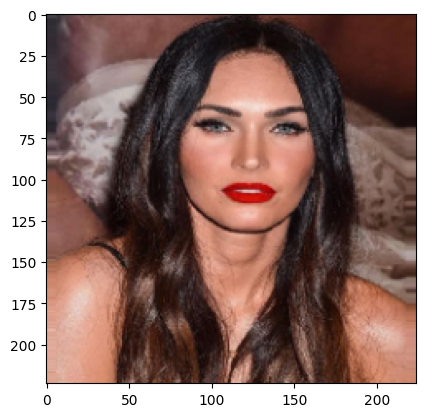

In [80]:
batch_x,batch_y=train_generator[7]
mpl.imshow(batch_x[6])
mpl.show()

In [81]:
x=np.reshape(batch_x[6],(1,224,224,3))
res=np.argmax(model.predict(x))
if res==0:
  print("Angelina Jolie")
elif res==1:
  print("Brad Pitt")
elif res==2:
  print("Denzel Washington")
elif res==3:
  print("Hugh Jackman")
elif res==4:
  print("Jennifer Lawrence")
elif res==5:
  print("Johnny Depp")
elif res==6:
  print("Kate Winslet")
elif res==7:
  print("Leonardo DiCaprio")
elif res==8:
  print("Megan Fox")
elif res==9:
  print("Natalie Portman")
elif res==10:
  print("Nicole Kidman")
elif res==11:
  print("Robert Downey Jr")
elif res==12:
  print("Sandra Bullock")
elif res==13:
  print("Scarlett Johanssen")
elif res==14:
  print("Tom Cruise")
elif res==15:
  print("Tom Hanks")
elif res==16:
  print("Will Smith")

1/1 [==============================] - 0s 36ms/step
Megan Fox


In [ ]:
#Code for Loading the image
# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = 'path of your dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Sample code for solving
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Function to create the CNN architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 20

# Load and preprocess the dataset (example)
# Replace with actual loading and preprocessing steps
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Example input shape (to be adjusted based on dataset)
input_shape = train_images.shape[1:]
num_classes = len(set(train_labels.flatten()))

# Create the model
model = create_model(input_shape, num_classes)
model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**You can utilize any code, including our existing code, to enhance your project.**

**All the best**